In [1]:
from Models.Autoencoder import Compile_model,Train_model

In [2]:
Encoder,Decoder,Autoencoder= Compile_model(input_shape=(28, 28,1),code_size=9)
Autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 1)         10        
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 30)                4530      
                                                                 
 dense_2 (Dense)             (None, 9)                 279       
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         1233

2022-05-09 02:29:11.559654: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-09 02:29:11.559712: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (UB): /proc/driver/nvidia/version does not exist
2022-05-09 02:29:11.560531: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from tensorflow import keras
import numpy as np

(x_train, y_train_), (x_val, y_val_) = keras.datasets.mnist.load_data()

x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_val = np.expand_dims(x_val, -1).astype("float32") / 255

In [4]:
Model,my_history=Train_model(Autoencoder,x_train,x_train,x_val,x_val)

Loaded weights!


In [5]:
temp=Encoder.predict(x_train)


2022-05-09 02:29:47.149331: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


In [6]:
temp.shape
y_train_.shape

(60000,)

In [7]:
x_test_predicted=Decoder.predict(temp)


2022-05-09 02:29:56.264523: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


In [10]:
import matplotlib.pyplot as plt


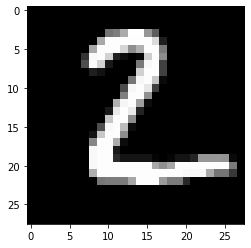

In [11]:
plt.imshow(x_val[1], cmap='gray',)

In [ ]:
np.save('my_history.npy',history_keras.history)
np.load('my_history.npy',allow_pickle='TRUE').item()

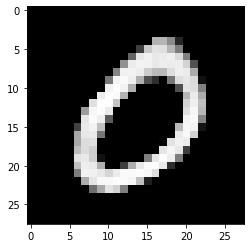

In [12]:
plt.imshow(x_test_predicted[1], cmap='gray',)